In [1]:
from shapely.geometry import (box, LineString, MultiLineString, MultiPoint,
    Point, Polygon, MultiPolygon, shape, GeometryCollection)
from shapely_tools import *

In [2]:
# plot functions
import matplotlib.pyplot as plt
%matplotlib inline

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, '.', color='#999999', zorder=3)

def plot_point(ax, ob, color='#000000'):
    x, y = ob.xy
    ax.plot(x, y, 'o', color=color, zorder=4, markersize=7)
    
def plot_bounds(ax, ob, color='#000000', marker='o'):
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, marker, color=color, zorder=3)

def plot_line(ax, ob, color='red'):
    x, y = ob.xy
    ax.plot(x, y, color=color, alpha=0.7, linewidth=2, solid_capstyle='round', zorder=2)
    

def baseplot(lines, title='', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=(5, 5))
    for line in lines:
        plot_line(ax, line, 'grey')
        plot_bounds(ax, line)
        plot_coords(ax, line)       

    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [10]:
isinstance(None, )


NameError: name 'NoneType' is not defined

(-0.2, 1.2)

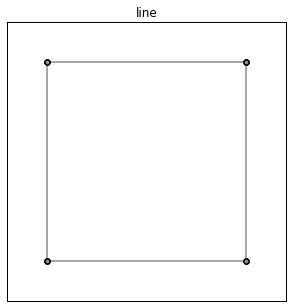

In [3]:
bbox = shapely.geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

lines = explode_polygons(bbox)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
baseplot(lines, 'line', ax=ax)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)


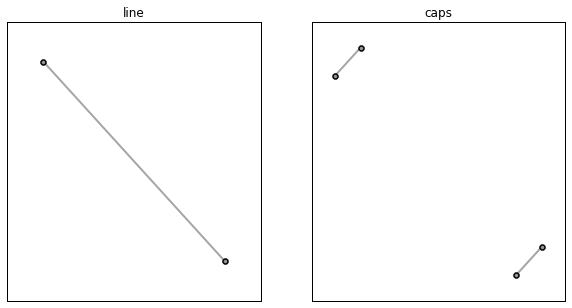

In [4]:
l1 = LineString([[0, 1], [1, 0]])
lines_cap = cap_lines(l1, offset=0., length=0.2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
baseplot([l1], 'line', ax=ax[0])
ax[0].set_xlim(-0.2, 1.2)
ax[0].set_ylim(-0.2, 1.2)
baseplot(lines_cap, 'caps', ax=ax[1])
ax[1].set_xlim(-0.2, 1.2)
a = ax[1].set_ylim(-0.2, 1.2)

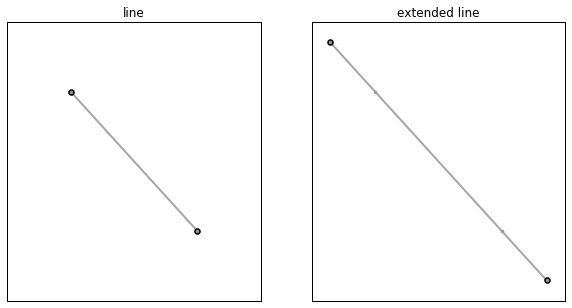

In [5]:
l1 = LineString([[0, 1], [1, 0]])
l1_extended = extend_line(l1, offset=0.5, side='both')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
baseplot([l1], 'line', ax=ax[0])
ax[0].set_xlim(-0.5, 1.5)
ax[0].set_ylim(-0.5, 1.5)
baseplot([l1_extended], 'extended line', ax=ax[1])
ax[1].set_xlim(-0.5, 1.5)
a = ax[1].set_ylim(-0.5, 1.5)

In [6]:
a = {'id': {'id2': 2}, 'blal': 2}
'id2' in a['id']

True

[0, 0, 1, 1]
number of lines after split: 4


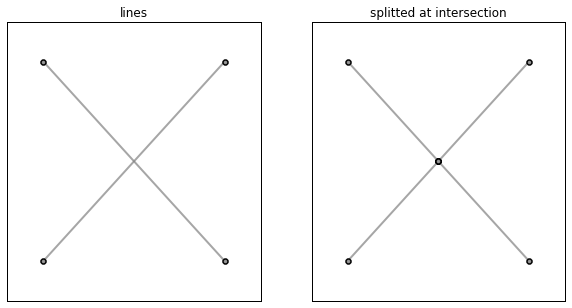

In [7]:
l1 = LineString([[0, 1], [1, 0]])
l2 = LineString([[0, 0], [1, 1]])
lines = [l1, l2]

# find intersection points of boundaries and lines and split lines based on it
lines_split, index = split_lines(lines, return_index=True)
print(index)
print("number of lines after split: {:d}".format(len(lines_split)))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
baseplot(lines, 'lines', ax=ax[0])
baseplot(lines_split, 'splitted at intersection', ax=ax[1])
ax[0].set_xlim(-0.2, 1.2)
ax[0].set_ylim(-0.2, 1.2)
ax[1].set_xlim(-0.2, 1.2)
a = ax[1].set_ylim(-0.2, 1.2)

number of lines after snap: 2


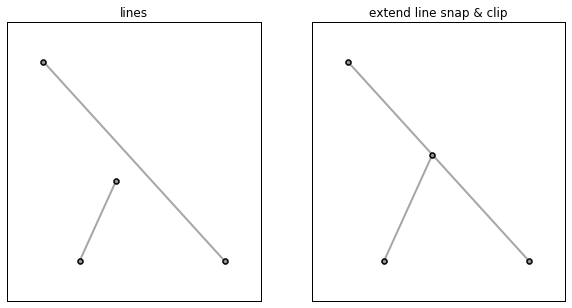

In [8]:
l1 = LineString([[0, 1], [1, 0]])
l2 = LineString([[.2, 0], [.4, .4]])
lines = [l1, l2]

# find intersection points of boundaries and lines and split lines based on it
lines_snap = snap_lines(lines, max_dist=0.5)
print("number of lines after snap: {:d}".format(len(lines_snap)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
baseplot(lines, 'lines', ax=ax[0])
baseplot(lines_snap, 'extend line snap & clip', ax=ax[1])
ax[0].set_xlim(-0.2, 1.2)
ax[0].set_ylim(-0.2, 1.2)
ax[1].set_xlim(-0.2, 1.2)
a = ax[1].set_ylim(-0.2, 1.2)

[0, 0, 1, 2, 2, 2]
number of lines after split: 6


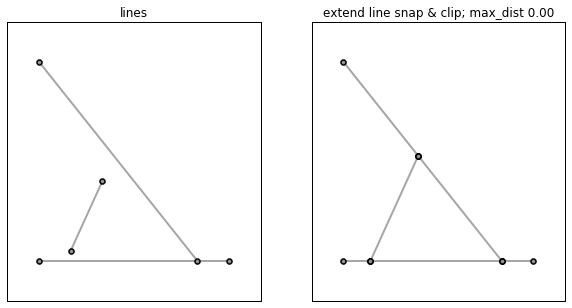

In [9]:
l1 = LineString([[0, 1], [1, 0]])
l2 = LineString([[.2, 0.05], [.4, .4]])
l3 = LineString([[0,0], [1.2, 0]])
lines = [l1, l2, l3]

# find intersection points of boundaries and lines and split lines based on it
max_dist=0.0
lines_snap, idx_snap = snap_lines(lines, max_dist=10, tolerance=1e-3, return_index=True)
lines_split, index = split_lines(lines_snap, tolerance=1e-3, return_index=True)
print(index)
print("number of lines after split: {:d}".format(len(index)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
baseplot(lines, 'lines', ax=ax[0])
baseplot(lines_split, 'extend line snap & clip; max_dist {:.2f}'.format(max_dist), ax=ax[1])
ax[0].set_xlim(-0.2, 1.4)
ax[0].set_ylim(-0.2, 1.2)
ax[1].set_xlim(-0.2, 1.4)
a = ax[1].set_ylim(-0.2, 1.2)